In [12]:
from music21 import *

In [65]:
%run chord_logic.ipynb

import copy
import math

def harmonize(melody):
    '''
    Given a melody as a music21 Score object, returns a new Score object involving
    a possible harmonization of the melody.
    '''
    # > let's at first assume we're assigning a chord every beat for simplicity's sake
    
    melody_key = melody.analyze('key')
    
    harmonized = copy.deepcopy(melody)
    p2 = stream.Part()
    if melody.keySignature != None:
        p2.append([melody.keySignature])
    if melody.timeSignature != None:
        p2.append([melody.timeSignature])
    harmonized.append(p2)
    
    chord_list = []
    roman_numeral_list = []
    
    # chord[last melody note] = tonic
    if melody_key.type == 'major':
        chord_list.append(chord.Chord([p.transpose(-12) for p in roman.RomanNumeral("I", melody_key)]))
        roman_numeral_list.append(roman.RomanNumeral("I", melody_key))
    if melody_key.type == 'minor':
        chord_list.append(chord.Chord([p.transpose(-12) for p in roman.RomanNumeral("i", melody_key)]))
        roman_numeral_list.append(roman.RomanNumeral("i", melody_key))
    
    
    # working backwards from last chord, iterate through each beat and call find_roman_numeral()
    for i in range(math.ceil(melody.highestTime)-2, -1, -1):
        print(i)
        for obj in melody.flatten().getElementsByOffset(i, math.ceil(melody.highestTime), includeEndBoundary=False, mustBeginInSpan=False):
            print(obj)
        new_roman = find_roman_numeral(
            melody_note = melody.flatten().getElementsByOffset(i, math.ceil(melody.highestTime), includeEndBoundary=False, mustBeginInSpan=False).next(note.Note).pitch,
            following_chord = roman_numeral_list[0],
            k = melody_key
        )
        chord_list.insert(0, chord.Chord([p.transpose(-12) for p in new_roman]))
        roman_numeral_list.insert(0, new_roman)
    
    for i in range(len(chord_list)):
        p2.append(chord_list[i])
    
    return harmonized

6
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note C>
5
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note C>
4
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note C>
3
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note C>
2
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note C>
1
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note C>
0
<music21.clef.TrebleClef>
<music21.meter.TimeSignature 4/4>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note C>


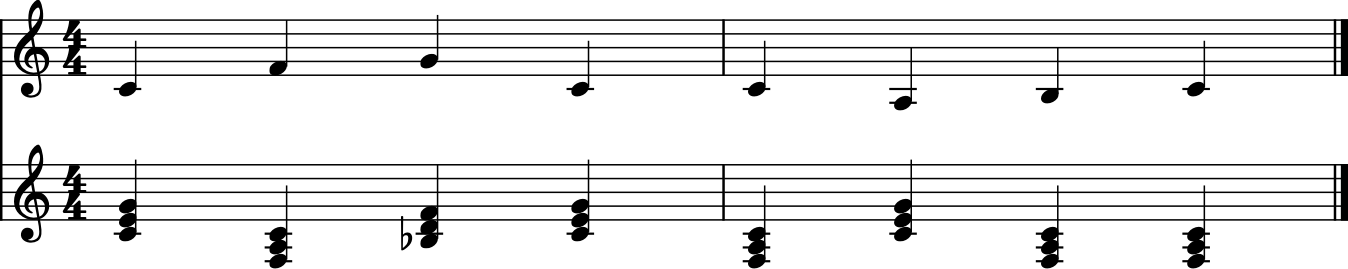

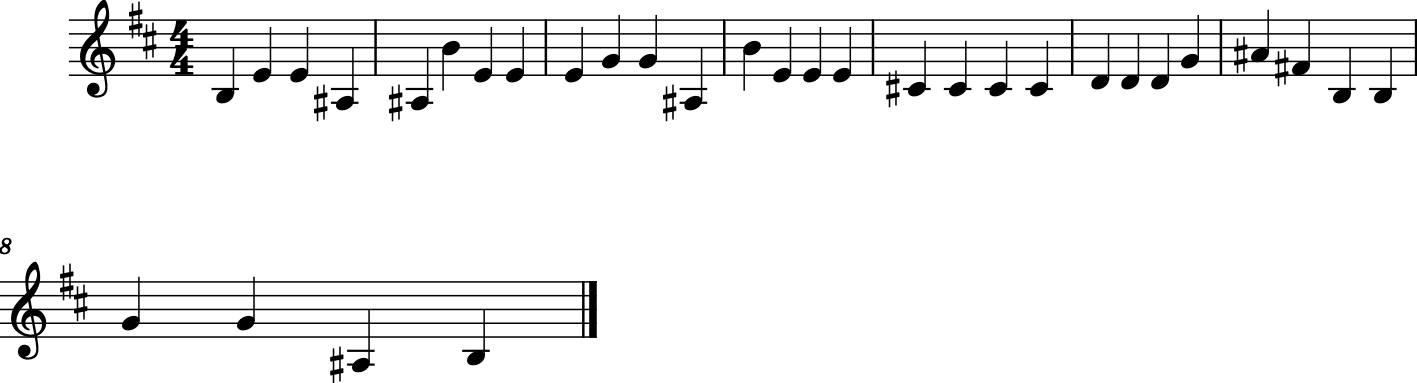

In [66]:
import random

#NOTE: 1, 2, 3_5, 5_5, 6, 7, and 8 have only quarter/half/whole notes

# simple melody - I-IV-V-I works in both measures, though vi is also valid in beat 2 of measure 2
sample_melody_1 = stream.Score()
sample_melody_1.append(converter.parse("tinyNotation: 4/4 c f g c c A B c"))
#sample_melody_1.show()
harmonize(sample_melody_1).show()

# slightly more complicated - measure 2 can be viewed as (IV/vi)-ii-(V/viio)-I. still only quarter notes
sample_melody_2 = stream.Score()
sample_melody_2.append(converter.parse("tinyNotation: 4/4 c f g c' a d B c"))
#sample_melody_2.show()

# slightly different rhythm, involving some 8th notes, and contains some room for interpreting things as V7 chords
sample_melody_3 = stream.Score()
sample_melody_3.append(converter.parse("tinyNotation: 4/4 c2 g8 f8 e4 e d f e"))
#sample_melody_3.show()

# modified to have no 8th notes, and contains some room for interpreting things as V7 chords
sample_melody_3_5 = stream.Score()
sample_melody_3_5.append(converter.parse("tinyNotation: 4/4 c2 g f e d f e"))
#sample_melody_3_5.show()

# new key of G major, and slightly more complex rhythm involving 16th notes
sample_melody_4 = stream.Score()
sample_melody_4.append(converter.parse("tinyNotation: 4/4 g4 c'4 f#16 d16 f#8 g4 b c' a8 f#8 g4"))
sample_melody_4.append(key.KeySignature(1))
#sample_melody_4.show()

# slightly longer melody, with varying T(-PD)-D-T segment lengths
sample_melody_5 = stream.Score()
sample_melody_5.append(converter.parse("tinyNotation: 4/4 c a b c' a g c'8 a8 c'4 a f d g8 f8 e4 d G c"))
#sample_melody_5.show()

# modified version, with no 8th notes and in A Major
sample_melody_5_5 = stream.Score()
sample_melody_5_5.append(converter.parse("tinyNotation: 4/4 A f# g# a f# e f# a f# d B e c# B E A"))
sample_melody_5_5[0].keySignature = key.KeySignature(3)
#sample_melody_5_5.show()

# this will be interesting
sample_melody_6 = stream.Score()
sample_melody_6.append(converter.parse("tinyNotation: 4/4 c d c e c f c g c a c b c B c2 c4 d e f g a b c' b a g f e d c2"))
#sample_melody_6.show()

# randomly generated
current_func = 0
melody_7_str = ''
is_leading_tone = 0 # 0 is "no", 1 is "was previously B", 2 is "was previously b"
for i in range(30):
    current_func += random.choice([0, 0, 0, 1, 1])
    current_func = current_func%3
    if current_func == 0:
        if is_leading_tone == 1:
            melody_7_str += " c"
        elif is_leading_tone == 2:
            melody_7_str += " c'"
        else:
            melody_7_str += random.choice([" c", " e", " g", " c'"])
        is_leading_tone = 0
    if current_func == 1:
        melody_7_str += random.choice([" d", " f", " a", " c'"])
    if current_func == 2:
        if is_leading_tone == 1:
            melody_7_str += " B"
        elif is_leading_tone == 2:
            melody_7_str += " b"
        else:
            melody_7_str += random.choice([" B", " d", " g", " b"])
            if melody_7_str[-1] == "B":
                is_leading_tone = 1
            if melody_7_str[-1] == "b":
                is_leading_tone = 2
sample_melody_7 = stream.Score()
sample_melody_7.append(converter.parse("tinyNotation:"+melody_7_str+" B c"))
#sample_melody_7.show()
#sample_melody_7.show('midi')

# randomly generated 2, in b minor, and with different weights
current_func = 0
melody_8_str = ''
is_leading_tone = 0 # 0 is "no", 1 is "was previously A#", 2 is "was previously a#"
for i in range(30):
    current_func += random.choice([0, 0, 0, 1, 1])
    current_func = current_func%3
    if current_func == 0:
        if is_leading_tone == 1:
            melody_8_str += " B"
        elif is_leading_tone == 2:
            melody_8_str += " b"
        else:
            melody_8_str += random.choice([" B", " B", " B", " d", " d", " f#", " b"])
        is_leading_tone = 0
    if current_func == 1:
        melody_8_str += random.choice([" c#", " e", " e", " e", " g", " g", " g", " b"])
    if current_func == 2:
        if is_leading_tone == 1:
            melody_8_str += " A#"
        elif is_leading_tone == 2:
            melody_8_str += " a#"
        else:
            melody_8_str += random.choice([" A#", " c#", " c#", " c#", " f#", " f#", " a#"])
            if melody_8_str[-2:-1] == "A#":
                is_leading_tone = 1
            if melody_8_str[-2:-1] == "a#":
                is_leading_tone = 2
sample_melody_8 = stream.Score()
sample_melody_8.append(converter.parse("tinyNotation:"+melody_8_str+" A# B"))
sample_melody_8[0].keySignature = key.KeySignature(2)
sample_melody_8.show()
#sample_melody_8.show('midi')


